# **Scenario: Retail Sales Forecasting with Microsoft Fabric**

### **Business Context**


#### A nationwide retailer wants to predict monthly store **sales revenue** in order to optimize advertising budgets, promotional activity, and staffing. By understanding which operational and market factors drive sales, they can allocate resources more effectively and increase ROI.


________________________________________

##### **Dataset Summary**
###### Scope: 40 stores × 24 months = 960 rows (store-month grain)<br><br>
##### Although there are different columns available, we're going to focus on the ones identified below.<br><br>

##### **Target (Dependent Variable):** monthly_sales → total store revenue for the month.<br><br>

##### **Independent Variables (features):**
###### 1. ad_spend → monthly advertising budget.
###### 2. foot_traffic → estimated store visits.
###### 3. avg_price → average product price.
###### 4. staff_count → number of staff scheduled.
###### 5. store_size_sqft → size of the store.
###### 6. promo_days → number of promotional days in the month.
###### 7. local_income_index → index of local income levels (100 = national average).


# **Read data from Github repository**

#### https://github.com/EmpoweredAnalysts/FabricRetailSales

In [2]:
#read the csv file from the github repo containing the Retail dataset
import pandas as pd 

retail_github_repo = pd.read_csv("https://github.com/EmpoweredAnalysts/FabricRetailSales/raw/refs/heads/main/retail_sales_demo_data.csv")

retail_github_repo.head(10)


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 4, Finished, Available, Finished)

,store_id,year,month,month_index,is_holiday_month,ad_spend,foot_traffic,avg_price,staff_count,store_size_sqft,promo_days,competitors_within_3km,inventory_fill_rate,returns_rate,local_income_index,parking_spaces,store_age_years,monthly_sales
0,1,2023,1,1,0,NaN,3175,28.26,41,29476,4,1,0.930,0.0422,98.3,263,11,2982.20
1,2,2023,1,1,0,NaN,3717,19.86,31,21933,4,3,0.952,0.0415,93.7,171,5,1867.48
2,3,2023,1,1,0,NaN,3747,17.52,44,36259,4,1,0.944,0.0427,97.3,285,8,2141.46
3,4,2023,1,1,0,NaN,5098,25.16,33,21798,6,2,0.965,0.0398,111.4,174,9,3840.05
4,5,2023,1,1,0,NaN,6612,21.03,51,45448,2,2,0.960,0.0420,114.3,389,9,4233.70
5,6,2023,1,1,0,23019.76,1000000,23.50,41,31415,2,3,0.945,0.0254,93.5,251,1,4517.63
6,7,2023,1,1,0,7121.50,3426,17.70,28,20125,4,1,0.921,0.0365,96.3,179,9,1547.81
7,8,2023,1,1,0,8089.90,3552,22.11,40,31843,3,6,0.923,0.0343,103.6,264,2,2066.45
8,9,2023,1,1,0,26332.31,5913,18.51,42,32324,4,2,0.938,0.0403,100.2,251,5,3949.88
9,10,2023,1,1,0,9705.63,3558,20.85,34,29510,2,5,0.973,0.0427,113.9,249,9,2146.56


In [3]:
# Load data to tables 
# we need to use spark to write it to the tables section of the Lakehouse which is why we are converting it to a spark dataframe)

# Convert pandas DataFrames to PySpark DataFrames
retail_github_repo_spark = spark.createDataFrame(retail_github_repo)

# Write DataFrames to Delta table
retail_github_repo_spark.write.format("delta").mode("overwrite").saveAsTable("monthly_retail")



StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 5, Finished, Available, Finished)

<div style="background-color: #e6f7ff; padding: 10px;">

### **Activity:**
#### Run the code cells above to source the data and create the monthly_retail table in the lakehouse

## Select specific fields for analysis and convert to pandas dataframe from a pyspark dataframe

In [4]:
Retail_Sales = (
    spark.table("monthly_retail")
         .select(
                "monthly_sales",
                "ad_spend",
                "foot_traffic",
                "avg_price",
                "staff_count",
                "store_size_sqft",
                "promo_days",
                "local_income_index"
                )
                )


Retail_Sales_pd = Retail_Sales.toPandas()

Retail_Sales_pd.head()


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 6, Finished, Available, Finished)

,monthly_sales,ad_spend,foot_traffic,avg_price,staff_count,store_size_sqft,promo_days,local_income_index
0,4665.15,21305.00,3911,29.14,39,29476,3,98.3
1,2234.96,12121.62,3773,20.36,36,21933,2,93.7
2,2238.27,13049.12,3581,17.48,48,36259,2,97.3
3,2385.02,17884.95,4089,25.67,31,21798,3,111.4
4,3180.39,7663.04,5475,21.48,54,45448,4,114.3


<div style="background-color: #e6f7ff; padding: 10px;">

### **Activity:**
#### Run the code cell above to select specific fields from the monthly_retail table and available as a pandas dataframe

# **Exploratory Data Analysis**

### The dataset contains some missing values in the column "ad_spend" and an extremely high value in the column "foot_traffic".

#### We'll identify these values using Data Wrangler and remove them from the analysis before moving onto explore our data using a correlation matrix and some scatterplots

### **1.  Explore data in Data Wrangler**


#### To use Data Wrangler ensure you have run the previous cells as there need to be active dataframes available for it to work.

#### Go to the ribbon - **Data Wrangler**, click on the drop down and choose the **dataframe** you want to explore.

#### We'll use the pandas dataframe **Retail_Sales_pd**

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Open Data Wrangler, selecting the pandas dataframe **Retail_Sales_pd**

### **2. Clean data in Data Wrangler**

In [5]:
# Code generated by Data Wrangler for pandas DataFrame

def clean_data(Retail_Sales_pd):
    # Filter rows based on column: 'ad_spend'
    Retail_Sales_pd = Retail_Sales_pd[Retail_Sales_pd['ad_spend'].notna()]
    # Filter rows based on column: 'foot_traffic'
    Retail_Sales_pd = Retail_Sales_pd[Retail_Sales_pd['foot_traffic'] < 500000]
    return Retail_Sales_pd

Retail_Sales_pd_clean = clean_data(Retail_Sales_pd.copy())
Retail_Sales_pd_clean.head()

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 7, Finished, Available, Finished)

,monthly_sales,ad_spend,foot_traffic,avg_price,staff_count,store_size_sqft,promo_days,local_income_index
0,4665.15,21305.00,3911,29.14,39,29476,3,98.3
1,2234.96,12121.62,3773,20.36,36,21933,2,93.7
2,2238.27,13049.12,3581,17.48,48,36259,2,97.3
3,2385.02,17884.95,4089,25.67,31,21798,3,111.4
4,3180.39,7663.04,5475,21.48,54,45448,4,114.3


<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Add code from Data Wrangler in a cell below that cleans the data and run the code:
##### 1. Filters out the missing values from ad_spend 
##### 2. Filters out the outlier (>500k) from foot_traffic

### **3. Correlation Matrix**

In [6]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns  # for the heatmap

# Compute correlation matrix
corr_matrix = Retail_Sales_pd_clean.corr()

corr_matrix

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 8, Finished, Available, Finished)

,monthly_sales,ad_spend,foot_traffic,avg_price,staff_count,store_size_sqft,promo_days,local_income_index
monthly_sales,1.000000,0.544561,0.595834,0.409691,0.258686,0.273188,0.152503,0.187385
ad_spend,0.544561,1.000000,0.541062,0.000739,-0.015510,-0.024261,0.262872,0.026155
foot_traffic,0.595834,0.541062,1.000000,-0.070236,0.351468,0.384951,0.230449,0.254953
avg_price,0.409691,0.000739,-0.070236,1.000000,0.005982,0.004554,-0.020073,0.306353
staff_count,0.258686,-0.015510,0.351468,0.005982,1.000000,0.947219,-0.036788,0.185847
store_size_sqft,0.273188,-0.024261,0.384951,0.004554,0.947219,1.000000,-0.032579,0.216145
promo_days,0.152503,0.262872,0.230449,-0.020073,-0.036788,-0.032579,1.000000,0.031606
local_income_index,0.187385,0.026155,0.254953,0.306353,0.185847,0.216145,0.031606,1.000000


<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the code to create the correlation matrix


### **4. Scatterplots**

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 9, Finished, Available, Finished)

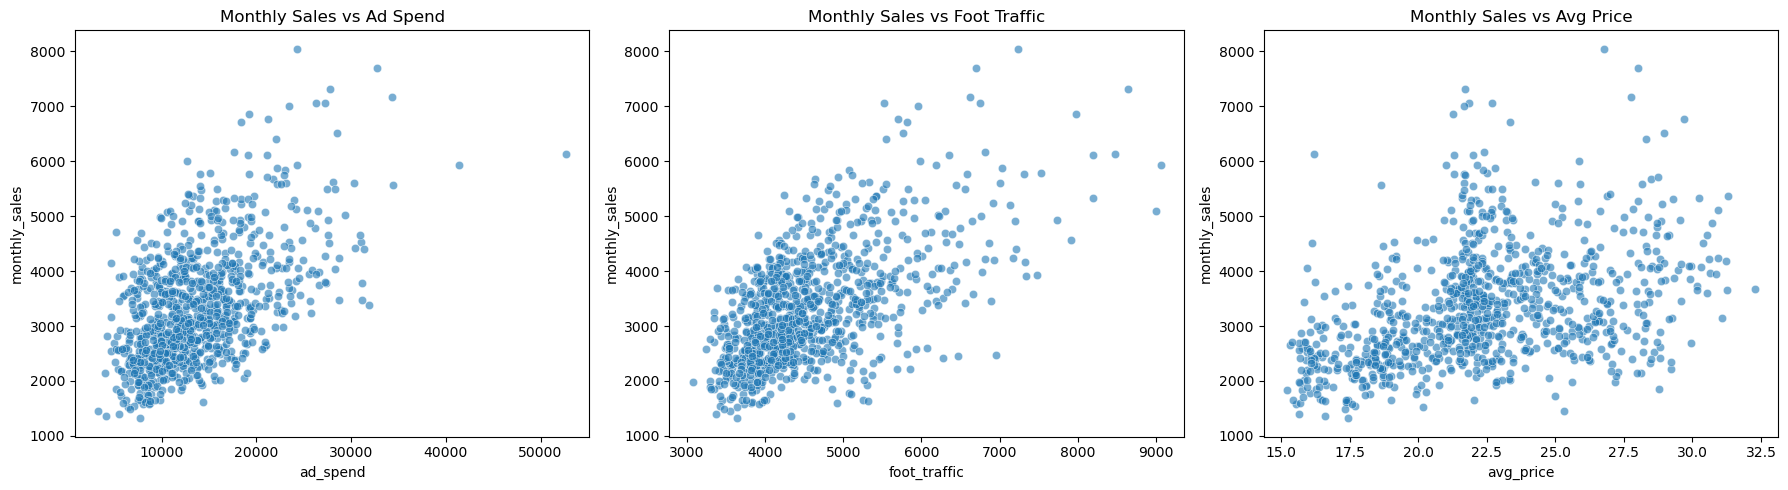

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatterplots
sns.scatterplot(data=Retail_Sales_pd_clean, x="ad_spend", y="monthly_sales", alpha=0.6, ax=axes[0])
axes[0].set_title("Monthly Sales vs Ad Spend")

sns.scatterplot(data=Retail_Sales_pd_clean, x="foot_traffic", y="monthly_sales", alpha=0.6, ax=axes[1])
axes[1].set_title("Monthly Sales vs Foot Traffic")

sns.scatterplot(data=Retail_Sales_pd_clean, x="avg_price", y="monthly_sales", alpha=0.6, ax=axes[2])
axes[2].set_title("Monthly Sales vs Avg Price")

plt.tight_layout()
plt.show()


<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the code to create the scatterplots


### **Hypothesis**

#### We will use the variables **Ad Spend**, **Foot Traffic** and **Avg Price** to take into our model

##### H1 — **Advertising Spend**: Increasing advertising spend is positively associated with higher monthly sales.
##### H2 — **Foot Traffic**: Higher foot traffic leads to higher monthly sales.
##### H3 — **Average Price**: An increase in average price has a measurable relationship with monthly sales

# **Linear Regression**


## **Graphical User Interface (GUI) & Code Based** <br><br>

##### Our aim in this section is to:
##### 1.	Create an Experiment and get set up with MLflow
##### 2.	Create our linear regression model
##### 3.	Improve the regression model by adjusting the variables and we’ll the view the runs that are created within the experiment we’ve set up. This will allow us to compare those different runs.
##### 4.    Save the run as an ML model

##### _This section is a mixture of using the visual interface in Fabric as well as code. We’ll then go onto repeat this process using a code only approach_

### 1. Create an Experiment and MLflow set up

#### An experiment is a container that allows us to log information about our machine learning code like parameters, code versions and output files. You can visualize, search for and compare different runs.

#### You can find more information at https://learn.microsoft.com/en-us/fabric/data-science/machine-learning-experiment

#### To create an experiment using the visual interface in Fabric – go to the workspace you are working in
#### &nbsp;&nbsp;&nbsp; ●  Click on New item (top left)
#### &nbsp;&nbsp;&nbsp; ●  Under **Analyze and train data** select **Experiment**
#### &nbsp;&nbsp;&nbsp; ● Name the Experiment **Experiment1**: <u>MAKE SURE THERE ARE NO SPACES!!!</u>
#### &nbsp;&nbsp;&nbsp; ● Observe the item has been added to the workspace. Go to the workspace, and observe that the experiment is now an item in the workspace. It’s ready for runs to be allocated to it


<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Create an experiment using the visual interface in Microsoft Fabric - call it **Experiment1**

#### It is important to note that **runs are always created programmatically**

#### In other words, the Graphical User Interface (GUI) lets you browse experiments and their runs, but it does not have a “New Run” button.

#### A run is essentially the result of executing some training/analysis code, and it gets logged automatically when you assign it using mlflow.start_run(...). <br><br>

#### MLflow is an open-source Machine Learning Ops framework originally created by Databricks, and it is widely used across many platforms.
#### MLOps (Machine Learning Operations) is a set of practices, tools, and processes that help teams build, train, deploy, monitor, and maintain machine learning models reliably and at scale.

#### Documentation about MLflow can be found here: https://mlflow.org/docs/latest/

#### **Import ML Flow and set your experiment**
##### We are going to import ML Flow and relevant packages and define our experiment name

In [8]:
#Import MLflow and key packages we will need
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
import pandas as pd
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Point to your existing experiment
mlflow.set_experiment("Experiment1")


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 10, Finished, Available, Finished)

<Experiment: artifact_location='sds://onelakeuksouth.pbidedicated.windows.net/d8280304-38ea-436e-9dbb-c56239016605/9ba9d620-5754-48b1-b5c3-220e4359dd0e', creation_time=1768047797270, experiment_id='9ba9d620-5754-48b1-b5c3-220e4359dd0e', last_update_time=1768047797270, lifecycle_stage='active', name='Experiment1', tags={}>

##### Then we'll turn autologging off. If you keep autologging on, Fabric will store lots of different runs and information, much of which we might not need. We'll look at how to request exactly what you want. If you wish to keep autologging on you can explore this out of the session. It would create a generically named run alongside the one we create.

In [9]:
# Disable any autologgers that might auto-start a run: 
# This ensures we don't get randomly generated runs, just the one we define
try:
    mlflow.autolog(disable=True)
except Exception:
    pass
for _autolog in ("sklearn", "spark", "pyspark.ml", "xgboost", "lightgbm", "tensorflow", "pytorch"):
    try:
        getattr(mlflow, _autolog).autolog(disable=True)
    except Exception:
        pass

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 11, Finished, Available, Finished)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run both code blocks above to import ML Flow, point to your experiment (change the name as required) and turn autologging off

### 2. Create linear regression

#### &nbsp;&nbsp;&nbsp; **a. Create linear regression model**

#### **Create Linear Regression Model (2 variables)**


#### **The key steps here are:**

#### 1. Define the dependent variable and independent variables for our Linear Regression
#### 2. Create the model, storing key information from that model into a run (review the code below for more details). <br><br>
#### In this section we are using **two** types of Linear Regressions available to us. One is **OLS** from **Statsmodels** and the other is **Linear Regression** from **sklearn** (also known as scikit-learn). This is because **OLS** is better for the **Model Summary** it produces but isn't integrated into **MLFlow** like **sklearn** so it won't work when trying to make predictions later in the process. The mathematical process is exactly the same for both types so we will get the same results whilst benefiting from both packages. <br><br>

#### Step 1: Define the dependent and independent variables

##### **Key points to be aware of:**
##### 1. Make sure the dataset is using the correct one - here we are using **Retail_Sales_pd_clean**
##### 2. Ensure you have defined the IVs and DV that you want


In [10]:
# ------------------------------------------------
# 1. Define IVs and DV: Ensure dataframe is correct
# ------------------------------------------------
feature_cols = ["ad_spend", "foot_traffic"]

X = Retail_Sales_pd_clean[feature_cols]
y = Retail_Sales_pd_clean["monthly_sales"]

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 12, Finished, Available, Finished)

#### Step 2: Create Linear Regression model and store key information into a run

##### **Key points to be aware of:**
##### 1. Define the run name as required: here we are calling it **linear_regression_Monthly_Sales**
##### 2. See if you want to change any parameters and metrics from MLflow that you wish to store for that run. In my experience, it is easier to use GenAI to identify the correct naming for these elements rather than the MLflow documentation

In [12]:
# ------------------------------------------------
# 2. Train OLS (for summary) + sklearn (for logged model)
# ------------------------------------------------

# ------------------------------------------------
# User Settings: Define run name
# ------------------------------------------------
with mlflow.start_run(run_name="linear_regression_Monthly_Sales"):

# -------- Save OLS model (statsmodels) for rich summary to the run--------
    X_sm = sm.add_constant(X)  # add intercept term
    ols_model = sm.OLS(y, X_sm).fit()
    ols_summary_text = ols_model.summary().as_text()

    # Log OLS summary as a text artifact in this run
    mlflow.log_text(ols_summary_text, artifact_file="ols_model_summary.txt")


# --- Log OLS coefficients, p-values, F-stat, Prob(F-stat) ---
    # Coefficients (including intercept/const)
    for name, value in ols_model.params.items():
        mlflow.log_metric(f"ols_coef_{name}", float(value))

    # P-values for each coefficient
    for name, value in ols_model.pvalues.items():
        mlflow.log_metric(f"ols_pvalue_{name}", float(value))

    # F-statistic and its p-value
    if ols_model.fvalue is not None:
        mlflow.log_metric("ols_f_statistic", float(ols_model.fvalue))
    if ols_model.f_pvalue is not None:
        mlflow.log_metric("ols_prob_f_statistic", float(ols_model.f_pvalue))

# -------- sklearn LinearRegression for deployment/logging --------
    sk_model = LinearRegression()
    sk_model.fit(X, y)

    # Predictions from sklearn model (for metrics + signature)
    y_pred = sk_model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Log params + metrics related to the sklearn model
    mlflow.log_param("model_type", "LinearRegression (sklearn)")
    mlflow.log_param("features", feature_cols)
    mlflow.log_metric("mse_train_full", mse)
    mlflow.log_metric("r2_train_full", r2)

    # Log feature list as artifact
    mlflow.log_dict({"feature_cols": feature_cols}, artifact_file="feature_columns.json")

    # Create DataFrame for predictions with a named column (for output schema)
    y_pred_df = pd.DataFrame({"prediction": y_pred})

    # Create signature with named output column "prediction"
    signature = infer_signature(X, y_pred_df)

    # Log the sklearn model with signature + input example
    mlflow.sklearn.log_model(
        sk_model=sk_model,
        artifact_path="model",
        signature=signature,
        input_example=X.head(5)
    )

# ------------------------------------------------
# Print the OLS summary in the notebook
# ------------------------------------------------
print(ols_summary_text)


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 14, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:          monthly_sales   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     351.2
Date:                Sat, 10 Jan 2026   Prob (F-statistic):          6.15e-115
Time:                        12:25:28   Log-Likelihood:                -7716.4
No. Observations:                 954   AIC:                         1.544e+04
Df Residuals:                     951   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          242.2885    135.026      1.794   

#### **Observe the key statistics within the Model Summary**
#### View the adjusted r-squared, coefficients and p-values, F-statistic and Prob (F-statistic)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run two code cells above to define the variables and then create linear regression and save key information to the run

#### **b. View the First Run**

#### We are now ready to view the run. We will do this via the Graphical User Interface in Microsoft Fabric. <br> <br>

#### The quickest way is to click on the Run Name that is generated after the run OR
#### Open the Experiment (**Experiment1**) from the **workspace** <br> <br>
#### Which ever way you choose, you can then view the runs on the left-hand side  <br> <br>

#### **Key points:**
#### 1. If you click on it, you can see a txt file has been generated – click on this to view the model_summary that has been saved.
#### 2. In the main pane, we have details about the run, like the name, the date it was run, the experiment it has been assigned to and Run details: metrics like r2, and f_statistic, run parameters like coefficients, features and no. of rows. 
#### 3. It also shows you the input and output schema which are the IVs and DV. **It is essential that these are showing ready for when you decide on the final model.** <br> <br>
#### This gives you a sense of how you can start building up information about that specific iteration of the linear regression model.





<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### View the Run using the Graphical User Interface

#### **c. Create a 2nd run and view it**

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the **Linear Regression Code** again and **view** this 2nd run

#### Observe that if we run the code above twice, we get 2 runs named the same. <br><br>

#### This is because every time you execute mlflow.start_run(...) you create a new run, even if you reuse the same run_name. run_name is just a label; it’s not unique. This is useful for comparing multiple attempts of the same experiment.

#### If you’d prefer clearer separation it's fine to rename your runs. One approach is to automatically add the date/time at the end of the run name

##### **Various options are available to automatically add labels to the name like add the date/time at the end of the run name but are outside the scope of this session. GenAI tools are a great way of exploring the options available to you**


### 3. Improve the Linear Regression

#### We are now going to make some adjustments to the linear regression model to see if we can improve it by adjusting the variables.
#### We'll then see how we can compare different runs to see which one is optimal for selection as the final model

#### **a. Try and improve the model by adding avg_Price**


In [13]:
# ------------------------------------------------
# 1. Define IVs and DV: Ensure dataframe is correct
# ------------------------------------------------
feature_cols = ["ad_spend", "foot_traffic", "avg_price"]

X = Retail_Sales_pd_clean[feature_cols]
y = Retail_Sales_pd_clean["monthly_sales"]

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 15, Finished, Available, Finished)

In [14]:
# ------------------------------------------------
# 2. Train OLS (for summary) + sklearn (for logged model)
# ------------------------------------------------

# ------------------------------------------------
# User Settings: Define run name
# ------------------------------------------------
with mlflow.start_run(run_name="linear_regression_Monthly_Sales"):

# -------- Save OLS model (statsmodels) for rich summary to the run--------
    X_sm = sm.add_constant(X)  # add intercept term
    ols_model = sm.OLS(y, X_sm).fit()
    ols_summary_text = ols_model.summary().as_text()

    # Log OLS summary as a text artifact in this run
    mlflow.log_text(ols_summary_text, artifact_file="ols_model_summary.txt")


# --- Log OLS coefficients, p-values, F-stat, Prob(F-stat) ---
    # Coefficients (including intercept/const)
    for name, value in ols_model.params.items():
        mlflow.log_metric(f"ols_coef_{name}", float(value))

    # P-values for each coefficient
    for name, value in ols_model.pvalues.items():
        mlflow.log_metric(f"ols_pvalue_{name}", float(value))

    # F-statistic and its p-value
    if ols_model.fvalue is not None:
        mlflow.log_metric("ols_f_statistic", float(ols_model.fvalue))
    if ols_model.f_pvalue is not None:
        mlflow.log_metric("ols_prob_f_statistic", float(ols_model.f_pvalue))

# -------- sklearn LinearRegression for deployment/logging --------
    sk_model = LinearRegression()
    sk_model.fit(X, y)

    # Predictions from sklearn model (for metrics + signature)
    y_pred = sk_model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Log params + metrics related to the sklearn model
    mlflow.log_param("model_type", "LinearRegression (sklearn)")
    mlflow.log_param("features", feature_cols)
    mlflow.log_metric("mse_train_full", mse)
    mlflow.log_metric("r2_train_full", r2)

    # Log feature list as artifact
    mlflow.log_dict({"feature_cols": feature_cols}, artifact_file="feature_columns.json")

    # Create DataFrame for predictions with a named column (for output schema)
    y_pred_df = pd.DataFrame({"prediction": y_pred})

    # Create signature with named output column "prediction"
    signature = infer_signature(X, y_pred_df)

    # Log the sklearn model with signature + input example
    mlflow.sklearn.log_model(
        sk_model=sk_model,
        artifact_path="model",
        signature=signature,
        input_example=X.head(5)
    )

# ------------------------------------------------
# Print the OLS summary in the notebook
# ------------------------------------------------
print(ols_summary_text)

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 16, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:          monthly_sales   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     515.0
Date:                Sat, 10 Jan 2026   Prob (F-statistic):          1.26e-198
Time:                        12:26:07   Log-Likelihood:                -7519.6
No. Observations:                 954   AIC:                         1.505e+04
Df Residuals:                     950   BIC:                         1.507e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2767.4457    175.377    -15.780   

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the code above with the 3 independent variables and view the new run in the experiment

#### **b. Compare the runs in the Experiment interface and compare using the different functionality available**

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Go to the Experiment **Experiment1** and compare the different elements of the run to choose which will be the final model

### 4. Save a run as an ML Model using the Graphical User Interface <br><br>

#### Choose a run - click on the ellipsis and select **Open**. Save the Run as an ML Model and **Create a new ML Model**. **It is important to choose Folder: Model** and then name it as required (eg **MonthlySales_LR**)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### In the Experiment, choose the run you want to make the final model. Observe that this item is now in the workspace as an **ML Model**

## **Code Based Only** <br><br>

##### Our aim in this section is to:
##### 1.	Create an Experiment and get set up with MLflow
##### 2.	Create our linear regression model
##### 3.	Improve the regression model by adjusting the variables and we’ll the view the runs that are created within the experiment we’ve set up. This will allow us to compare those different runs.
##### 4.    Save the run as an ML model <br><br>
##### **_This section is a code only approach_**

### 1. Create an Experiment and MLflow set up

#### **Import ML Flow and set your experiment**
##### We are going to import ML Flow and relevant packages and define our experiment name
##### Notice that we are running the same code as in the GUI section for the experiment. If the experiment doesn't already exist, **mlflow.set_experiment** will create it for you.

In [15]:
#Import MLflow and key packages we will need
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
import pandas as pd
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Point to your existing experiment
mlflow.set_experiment("Experiment2") #CHANGE THE EXPERIMENT NAME HERE#

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 17, Finished, Available, Finished)

2026/01/10 12:27:31 INFO mlflow.tracking.fluent: Experiment with name 'Experiment2' does not exist. Creating a new experiment.


<Experiment: artifact_location='sds://onelakeuksouth.pbidedicated.windows.net/d8280304-38ea-436e-9dbb-c56239016605/0cac569c-1120-42ba-a1c2-5254fb705d44', creation_time=1768048052534, experiment_id='0cac569c-1120-42ba-a1c2-5254fb705d44', last_update_time=1768048052534, lifecycle_stage='active', name='Experiment2', tags={}>

##### Then we'll turn autologging off. If you keep autologging on, Fabric will store lots of different runs and information, much of which we might not need. We'll look at how to request exactly what you want. If you wish to keep autologging on you can explore this out of the session. It would create a generically named run alongside the one we create.

In [16]:
# Disable any autologgers that might auto-start a run: 
# This ensures we don't get randomly generated runs, just the one we define
try:
    mlflow.autolog(disable=True)
except Exception:
    pass
for _autolog in ("sklearn", "spark", "pyspark.ml", "xgboost", "lightgbm", "tensorflow", "pytorch"):
    try:
        getattr(mlflow, _autolog).autolog(disable=True)
    except Exception:
        pass

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 18, Finished, Available, Finished)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the 2 code cells above to import the required packages, create an experiment called **Experiment2** and turn autologging off

### 2. Create linear regression

#### &nbsp;&nbsp;&nbsp; **a. Create linear regression model**

#### These code cells are defining the DV and IVs and then created the linear regression. It is the same process as the GUI section. Please see that section for further details on this code.

In [17]:
# ------------------------------------------------
# 1. Define IVs and DV: Ensure dataframe is correct
# ------------------------------------------------
feature_cols = ["ad_spend", "foot_traffic"]

X = Retail_Sales_pd_clean[feature_cols]
y = Retail_Sales_pd_clean["monthly_sales"]

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 19, Finished, Available, Finished)

In [18]:
# ------------------------------------------------
# 2. Train OLS (for summary) + sklearn (for logged model)
# ------------------------------------------------

# ------------------------------------------------
# User Settings: Define run name
# ------------------------------------------------
with mlflow.start_run(run_name="linear_regression_Monthly_Sales"):

# -------- Save OLS model (statsmodels) for rich summary to the run--------
    X_sm = sm.add_constant(X)  # add intercept term
    ols_model = sm.OLS(y, X_sm).fit()
    ols_summary_text = ols_model.summary().as_text()

    # Log OLS summary as a text artifact in this run
    mlflow.log_text(ols_summary_text, artifact_file="ols_model_summary.txt")


# --- Log OLS coefficients, p-values, F-stat, Prob(F-stat) ---
    # Coefficients (including intercept/const)
    for name, value in ols_model.params.items():
        mlflow.log_metric(f"ols_coef_{name}", float(value))

    # P-values for each coefficient
    for name, value in ols_model.pvalues.items():
        mlflow.log_metric(f"ols_pvalue_{name}", float(value))

    # F-statistic and its p-value
    if ols_model.fvalue is not None:
        mlflow.log_metric("ols_f_statistic", float(ols_model.fvalue))
    if ols_model.f_pvalue is not None:
        mlflow.log_metric("ols_prob_f_statistic", float(ols_model.f_pvalue))

# -------- sklearn LinearRegression for deployment/logging --------
    sk_model = LinearRegression()
    sk_model.fit(X, y)

    # Predictions from sklearn model (for metrics + signature)
    y_pred = sk_model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Log params + metrics related to the sklearn model
    mlflow.log_param("model_type", "LinearRegression (sklearn)")
    mlflow.log_param("features", feature_cols)
    mlflow.log_metric("mse_train_full", mse)
    mlflow.log_metric("r2_train_full", r2)

    # Log feature list as artifact
    mlflow.log_dict({"feature_cols": feature_cols}, artifact_file="feature_columns.json")

    # Create DataFrame for predictions with a named column (for output schema)
    y_pred_df = pd.DataFrame({"prediction": y_pred})

    # Create signature with named output column "prediction"
    signature = infer_signature(X, y_pred_df)

    # Log the sklearn model with signature + input example
    mlflow.sklearn.log_model(
        sk_model=sk_model,
        artifact_path="model",
        signature=signature,
        input_example=X.head(5)
    )

# ------------------------------------------------
# Print the OLS summary in the notebook
# ------------------------------------------------
print(ols_summary_text)


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 20, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:          monthly_sales   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     351.2
Date:                Sat, 10 Jan 2026   Prob (F-statistic):          6.15e-115
Time:                        12:27:50   Log-Likelihood:                -7716.4
No. Observations:                 954   AIC:                         1.544e+04
Df Residuals:                     951   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          242.2885    135.026      1.794   

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run two code cells above to define the variables and then create linear regression and save key information to the run

#### **b. View the First Run**

#### We are now ready to view the run. We will do this using **code**. <br> <br>

In [19]:
# --------------------------------------------------------
# USER SETTINGS
# --------------------------------------------------------

experiment_name = "Experiment2" #UPDATE EXPERIMENT NAME AS REQUIRED*

##############################################################################
##############################################################################

# Get experiment object (will throw an exception if not found, so it's a nice sanity check)
experiment = mlflow.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id
print(f"Experiment id for {experiment_name}: {experiment_id}")

# Pull all runs for this experiment
runs_df = mlflow.search_runs(
    experiment_ids=[experiment_id],
    order_by=["metrics.r2_train_full DESC"]   # sort by your metric of interest
)


# ----------------------------------------------
# 1. Extract all coefficient & p-value metric names
# ----------------------------------------------
coef_cols = [c for c in runs_df.columns if c.startswith("metrics.ols_coef_")]
pval_cols = [c for c in runs_df.columns if c.startswith("metrics.ols_pvalue_")]

# ----------------------------------------------
# 2. Build base cols to show
# ----------------------------------------------
base_cols = [
    "run_id",
    "status",
    "start_time",
    "metrics.r2_train_full",
    "params.model_type",
]

# ----------------------------------------------
# 3. Add input schema (signature) as a column
# ----------------------------------------------
def get_signature(run_id):
    try:
        model_uri = f"runs:/{run_id}/model"
        info = mlflow.models.get_model_info(model_uri)
        return str(info.signature)
    except:
        return None

runs_df["input_schema"] = runs_df["run_id"].apply(get_signature)

# ----------------------------------------------
# 4. Build final columns list
# ----------------------------------------------
cols_to_show = base_cols + coef_cols + pval_cols + ["input_schema"]

# Show results
runs_df[cols_to_show]

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 21, Finished, Available, Finished)

Experiment id for Experiment2: 0cac569c-1120-42ba-a1c2-5254fb705d44


2026/01/10 12:28:05 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


,run_id,status,start_time,metrics.r2_train_full,params.model_type,metrics.ols_coef_ad_spend,metrics.ols_coef_const,metrics.ols_coef_foot_traffic,metrics.ols_pvalue_const,metrics.ols_pvalue_foot_traffic,metrics.ols_pvalue_ad_spend,input_schema
0,60e6dc4f-02e4-4d32-a3b5-04c4c6c71788,FINISHED,2026-01-10 12:27:49.454000+00:00,0.424814,LinearRegression (sklearn),0.058277,242.28854,0.498445,0.07307,1.618137e-43,1.741486e-25,"inputs: \n ['ad_spend': double (required), 'f..."


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 22, Finished, Available, Finished)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the cell above to view the run

### 3. Improve the Linear Regression

#### We are now going to make some adjustments to the linear regression model to see if we can improve it by adjusting the variables.
#### We'll then see how we can compare different runs to see which one is optimal for selection as the final model

#### **a. Try and improve the model by adding avg_Price**

In [20]:
# ------------------------------------------------
# 1. Define IVs and DV: Ensure dataframe is correct
# ------------------------------------------------
feature_cols = ["ad_spend", "foot_traffic", "avg_price"]

X = Retail_Sales_pd_clean[feature_cols]
y = Retail_Sales_pd_clean["monthly_sales"]

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 23, Finished, Available, Finished)

In [21]:
# ------------------------------------------------
# 2. Train OLS (for summary) + sklearn (for logged model)
# ------------------------------------------------

# ------------------------------------------------
# User Settings: Define run name
# ------------------------------------------------
with mlflow.start_run(run_name="linear_regression_Monthly_Sales"):

# -------- Save OLS model (statsmodels) for rich summary to the run--------
    X_sm = sm.add_constant(X)  # add intercept term
    ols_model = sm.OLS(y, X_sm).fit()
    ols_summary_text = ols_model.summary().as_text()

    # Log OLS summary as a text artifact in this run
    mlflow.log_text(ols_summary_text, artifact_file="ols_model_summary.txt")


# --- Log OLS coefficients, p-values, F-stat, Prob(F-stat) ---
    # Coefficients (including intercept/const)
    for name, value in ols_model.params.items():
        mlflow.log_metric(f"ols_coef_{name}", float(value))

    # P-values for each coefficient
    for name, value in ols_model.pvalues.items():
        mlflow.log_metric(f"ols_pvalue_{name}", float(value))

    # F-statistic and its p-value
    if ols_model.fvalue is not None:
        mlflow.log_metric("ols_f_statistic", float(ols_model.fvalue))
    if ols_model.f_pvalue is not None:
        mlflow.log_metric("ols_prob_f_statistic", float(ols_model.f_pvalue))

# -------- sklearn LinearRegression for deployment/logging --------
    sk_model = LinearRegression()
    sk_model.fit(X, y)

    # Predictions from sklearn model (for metrics + signature)
    y_pred = sk_model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Log params + metrics related to the sklearn model
    mlflow.log_param("model_type", "LinearRegression (sklearn)")
    mlflow.log_param("features", feature_cols)
    mlflow.log_metric("mse_train_full", mse)
    mlflow.log_metric("r2_train_full", r2)

    # Log feature list as artifact
    mlflow.log_dict({"feature_cols": feature_cols}, artifact_file="feature_columns.json")

    # Create DataFrame for predictions with a named column (for output schema)
    y_pred_df = pd.DataFrame({"prediction": y_pred})

    # Create signature with named output column "prediction"
    signature = infer_signature(X, y_pred_df)

    # Log the sklearn model with signature + input example
    mlflow.sklearn.log_model(
        sk_model=sk_model,
        artifact_path="model",
        signature=signature,
        input_example=X.head(5)
    )

# ------------------------------------------------
# Print the OLS summary in the notebook
# ------------------------------------------------
print(ols_summary_text)

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 24, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:          monthly_sales   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     515.0
Date:                Sat, 10 Jan 2026   Prob (F-statistic):          1.26e-198
Time:                        12:28:25   Log-Likelihood:                -7519.6
No. Observations:                 954   AIC:                         1.505e+04
Df Residuals:                     950   BIC:                         1.507e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2767.4457    175.377    -15.780   

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the code above with the 3 independent variables

#### **b. Compare the runs using code and filter as required**

In [22]:
import mlflow
import pandas as pd

# --------------------------------------------------------
# USER SETTINGS
# --------------------------------------------------------
experiment_name = "Experiment2"  # UPDATE EXPERIMENT NAME AS REQUIRED

filter_string = "metrics.r2_train_full > 0.6"  # SET ANY FILTERS YOU WANT
#filter_string = "metrics.r2_train_full > 0.4 AND metrics.ols_pvalue_const <0.05 "  # ALTERNATIVE SYNTAX FOR MULITPLE FILTERS
#filter_string = None  # uncomment to disable filtering

# --------------------------------------------------------
# LOAD EXPERIMENT
# --------------------------------------------------------
experiment = mlflow.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id
print(f"Experiment id for {experiment_name}: {experiment_id}")

# --------------------------------------------------------
# QUERY RUNS (WITH OPTIONAL FILTER)
# --------------------------------------------------------
search_args = dict(
    experiment_ids=[experiment_id],
    order_by=["metrics.r2_train_full DESC"],
)

if filter_string:
    search_args["filter_string"] = filter_string

runs_df = mlflow.search_runs(**search_args)

# --------------------------------------------------------
# HANDLE CASE: NO RUNS MATCH FILTER
# --------------------------------------------------------
if runs_df.empty:
    print(
        f"No runs found for experiment '{experiment_name}' "
        f"with filter: {filter_string!r}"
    )
    # Optional: show all runs without filter so you can see what's available
    # all_runs_df = mlflow.search_runs(experiment_ids=[experiment_id])
    # display(all_runs_df)
else:
    print(f"Runs returned: {len(runs_df)}")

    # ----------------------------------------------
    # 1. Extract all coefficient & p-value metric names
    # ----------------------------------------------
    coef_cols = [c for c in runs_df.columns if c.startswith("metrics.ols_coef_")]
    pval_cols = [c for c in runs_df.columns if c.startswith("metrics.ols_pvalue_")]

    # ----------------------------------------------
    # 2. Build base cols to show (only those that actually exist)
    # ----------------------------------------------
    candidate_base_cols = [
        "run_id",
        "status",
        "start_time",
        "metrics.r2_train_full",
        "params.model_type",
    ]
    base_cols = [c for c in candidate_base_cols if c in runs_df.columns]

    # ----------------------------------------------
    # 3. Add input schema (signature) as a column
    # ----------------------------------------------
    def get_signature(run_id):
        try:
            model_uri = f"runs:/{run_id}/model"
            info = mlflow.models.get_model_info(model_uri)
            return str(info.signature)
        except Exception:
            return None

    runs_df["input_schema"] = runs_df["run_id"].apply(get_signature)

    # ----------------------------------------------
    # 4. Build final columns list
    # ----------------------------------------------
    cols_to_show = base_cols + coef_cols + pval_cols + ["input_schema"]

    # Show results as a nice table
    display(runs_df[cols_to_show])
    

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 25, Finished, Available, Finished)

Experiment id for Experiment2: 0cac569c-1120-42ba-a1c2-5254fb705d44
Runs returned: 1


2026/01/10 12:28:35 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


SynapseWidget(Synapse.DataFrame, 36c96a02-b4f1-423d-ae32-b33a923a3e4d)

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 26, Finished, Available, Finished)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### View the runs in the experiment using code and filter as required

### 4. Save a run as an ML Model using code <br><br>

#### **a. Choose a run you want to deploy as a model**

In [23]:
import mlflow

# ============================
# USER SETTINGS
# ============================
run_id = "bc2763ff-78dd-43c1-b9c9-62da81babd72"   # run to promote
MODEL_NAME = "MonthlySales_LR_Experiment2"        # MLflow registered model name
OUTPUT_COL = "PredictedMonthlySales"              # desired output column name

# Version control:
# Choose ONE of these:
USE_NEXT_VERSION = True      # Set to either True or False: If True it will automatically use the next available model version. If false, you need to set the OVERRIDE_VERSION to a number
OVERRIDE_VERSION = None      # e.g. 5 → manually set model version; leave None to disable

#############################################################
#############################################################

# ============================================
# AUTOMATED MODEL REGISTRATION + TRANSFORMER
# This step turns the MLflow model into a Spark transformer so it can make predictions on your data in Fabric
# ============================================
import mlflow
import json
from mlflow.tracking import MlflowClient
from synapse.ml.predict import MLFlowTransformer

client = MlflowClient()

# ------------------------------------------------
# 1. Sanity check version settings
# ------------------------------------------------
if USE_NEXT_VERSION and OVERRIDE_VERSION is not None:
    raise ValueError(
        "Please choose only one version strategy: "
        "either USE_NEXT_VERSION = True or set OVERRIDE_VERSION (and USE_NEXT_VERSION = False)."
    )

# ------------------------------------------------
# 2. Determine model URI for this run
# ------------------------------------------------
model_uri = f"runs:/{run_id}/model"
print(f"Using model URI: {model_uri}")

# ------------------------------------------------
# 3. Automatically determine input columns
#    - First try feature_columns.json (if logged)
#    - Fallback: infer from MLflow model signature
# ------------------------------------------------
input_cols = None

# 3a. Try feature_columns.json artifact
try:
    # Assumes training code logged: mlflow.log_dict({"feature_cols": feature_cols}, "feature_columns.json")
    local_path = client.download_artifacts(run_id, "feature_columns.json")
    with open(local_path, "r") as f:
        feature_info = json.load(f)
    input_cols = feature_info.get("feature_cols")
    if input_cols:
        print(f"Loaded input columns from feature_columns.json: {input_cols}")
except Exception as e:
    print("Could not load feature_columns.json; will try to infer from model signature.")

# 3b. Fallback: infer from model signature
if not input_cols:
    try:
        model_info = mlflow.models.get_model_info(model_uri)
        sig = model_info.signature
        if sig and sig.inputs:
            input_cols = [field.name for field in sig.inputs.inputs]
            print(f"Inferred input columns from signature: {input_cols}")
    except Exception as e:
        print("Could not infer input columns from MLflow model signature.")

if not input_cols:
    raise ValueError(
        "Unable to determine input columns from either feature_columns.json or model signature. "
        "Please check that one of these was logged for this run."
    )

# ------------------------------------------------
# 4. Decide which model version to use
#    - Either register as next version
#    - Or use an explicitly overridden version
# ------------------------------------------------
if OVERRIDE_VERSION is not None:
    # Use an existing, manually specified version (no new registration)
    model_version = int(OVERRIDE_VERSION)
    print(f"Using manually overridden model version: {model_version}")

elif USE_NEXT_VERSION:
    # Register the run’s model -> MLflow auto-assigns the next version number
    result = mlflow.register_model(
        model_uri=model_uri,
        name=MODEL_NAME
    )
    model_version = int(result.version)
    print(f"Registered model '{MODEL_NAME}' as new version: {model_version}")

else:
    raise ValueError(
        "No model version strategy selected. "
        "Set USE_NEXT_VERSION = True or specify OVERRIDE_VERSION."
    )

# ------------------------------------------------
# 5. Build the MLFlowTransformer
#    (Builds a Spark transformer that uses this MLflow model
#     to generate predictions on Spark DataFrames.)
# ------------------------------------------------
mlflow_transformer = MLFlowTransformer(
    inputCols=input_cols,
    outputCol=OUTPUT_COL,
    modelName=MODEL_NAME,
    modelVersion=model_version
)

print("\nMLFlowTransformer is ready to use:")
print(f"  modelName    = {MODEL_NAME}")
print(f"  modelVersion = {model_version}")
print(f"  inputCols    = {input_cols}")
print(f"  outputCol    = {OUTPUT_COL}")

# Example usage (uncomment when you have a Spark DataFrame `df` with the required inputCols):
# scored_df = mlflow_transformer.transform(df)
# display(scored_df)


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 27, Finished, Available, Finished)

Using model URI: runs:/bc2763ff-78dd-43c1-b9c9-62da81babd72/model


Loaded input columns from feature_columns.json: ['ad_spend', 'foot_traffic', 'avg_price']
Registered model 'MonthlySales_LR_Experiment2' as new version: 1


Successfully registered model 'MonthlySales_LR_Experiment2'.


2026/01/10 12:29:11 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


2026/01/10 12:29:11 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 28, Finished, Available, Finished)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/functions.py:407: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.


<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### In the Experiment, choose the run you want to make the final model. Observe that this item is now in the workspace as an **ML Model**

#### **b. View list of models in the model registry**

In [24]:
# ============================================
# USER SETTINGS
# ============================================
# Set to None to show ALL models in the registry
# Or set to a specific model name, e.g. "MonthlySales_LR_Experiment2"

FILTER_MODEL_NAME = None
#FILTER_MODEL_NAME = "MonthlySales_LR_Experiment2"


# ============================================
# LIST MODELS + ALL VERSIONS + PARAMS (ROBUST)
# ============================================
from mlflow.tracking import MlflowClient
import pandas as pd

client = MlflowClient()
rows = []

def add_model_versions_for_name(model_name: str):
    """Collect rows for all versions of a given registered model name."""
    global rows
    versions = client.search_model_versions(f"name = '{model_name}'")
    for v in versions:
        features = None
        model_type = None

        # Try to fetch run params; if run is missing, keep going
        try:
            run = client.get_run(v.run_id)
            params = run.data.params
            features = params.get("features")
            model_type = params.get("model_type")
        except Exception as e:
            print(
                f"Warning: could not fetch run {v.run_id} "
                f"for model '{v.name}' v{v.version}: {e}"
            )

        rows.append({
            "model_name": v.name,
            "version": int(v.version),
            "stage": v.current_stage,
            "run_id": v.run_id,
            "features": features,
            "model_type": model_type,
        })


if FILTER_MODEL_NAME:
    # ----------------------------------------
    # Case 1: Only show a specific model
    # ----------------------------------------
    model_name = FILTER_MODEL_NAME
    print(f"Querying registry for model: {model_name!r}")

    try:
        _ = client.get_registered_model(model_name)  # sanity check
        add_model_versions_for_name(model_name)
    except Exception as e:
        print(f"No registered model found with name {model_name!r}.")
        print("Details:", e)

else:
    # ----------------------------------------
    # Case 2: Show ALL models in the registry
    # ----------------------------------------
    print("Querying registry for ALL models...")

    try:
        registered_models = client.search_registered_models()

        if not registered_models:
            print("MLflow registry returned no registered models.")
        else:
            for m in registered_models:
                add_model_versions_for_name(m.name)
    except Exception as e:
        print("Error while querying registered models root list:")
        print(e)


# --------------------------------------------
# Build and display results table
# --------------------------------------------
if rows:
    df = pd.DataFrame(rows).sort_values(["model_name", "version"])
    unique_models = df["model_name"].nunique()
    print(f"\nModels found in registry: {unique_models}")
    display(df)
else:
    print("\nNo models found in the MLflow Model Registry matching the filter criteria.")


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 29, Finished, Available, Finished)

Querying registry for ALL models...

Models found in registry: 2


SynapseWidget(Synapse.DataFrame, e73c0f9e-f017-4b20-8bc8-55145cd77209)

## **Predict on New Data** 

##### Our aim in this section is to predict on new data
##### We are going to approach this in 2 ways

##### 1. GUI Approach: using the wizard and the copy code option 
##### 2. Code Based approach <br><br>

##### NOTE: If we use the code that Microsoft Fabric generates (ie Option 1), it will create links unique to the tenant it was originally set up with. 
##### As such the demo will showcase how to go through those options but repeatable code will be provided below for the "code based approach" of option 2.


#### **To set ourselves up to do this, we'll first source some data that we will save in our Lakehouse**
##### This data comes from GitHub and contains only variables, not the Monthly Sales.
##### We will use the model we have created to make predictions on the monthly sales based on those variables in this new dataset.

In [25]:
#read the csv file from the github repo containing the new retail dataset called RetailSalesNewData.csv
import pandas as pd 

retail_new_data = pd.read_csv("https://github.com/EmpoweredAnalysts/FabricRetailSales/raw/refs/heads/main/RetailSalesNewData.csv")

# Load data to tables 
# we need to use spark to write it to the tables section of the Lakehouse which is why we are converting it to a spark dataframe)

# Convert pandas DataFrames to PySpark DataFrames
retail_new_data_spark = spark.createDataFrame(retail_new_data)

# Write DataFrames to Delta table
retail_new_data_spark.write.format("delta").mode("overwrite").saveAsTable("retail_new_data")



StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 30, Finished, Available, Finished)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the code in the cell above to read in the new dataset and save it to the Lakehouse
#### Refresh the Lakehouse to observe it has been added

#### **1. GUI approach using the wizard**

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Go to the Model and choose **Apply this version** - first select **copy code to apply**. Observe that you would need to add the file path from the source location and the destination location.<br><br>
#### If you want help to do this, you can choose **Apply this version** - then select **Apply this model in Wizard** following the steps
#### Paste the code in the empty cell block below and it should run with your links (NOTE: If you paste it in, be careful of indents!!!)


#### The code generated in this tenant looks like this:

In [ ]:
import mlflow
from synapse.ml.predict import MLFlowTransformer

df = spark.read.format("delta").load(
    "abfss://73e397d7-a3e5-4d23-af7d-b687d16d1c46@onelake.dfs.fabric.microsoft.com/b2a6adcd-fa7c-483c-98dc-9b2e4fbcaae0/Tables/retail_new_data"
)

model = MLFlowTransformer(
    inputCols=["ad_spend","foot_traffic","avg_price"],
    outputCol="PredictedMonthlySales",
    modelName="NewCheck",
    modelVersion=3
)
df = model.transform(df)

df.write.format('delta').mode("overwrite").save(
    "abfss://73e397d7-a3e5-4d23-af7d-b687d16d1c46@onelake.dfs.fabric.microsoft.com/b2a6adcd-fa7c-483c-98dc-9b2e4fbcaae0/Tables/new_retail_sales_predict"
)

#### Then drag across the new table from the Lakehouse into a cell (you might need to refresh the lakehouse)

In [ ]:
df = spark.sql("SELECT * FROM DataScienceLakehouse.new_retail_sales_predict LIMIT 1000")
display(df)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the 2 cells to predict on new data and then return the results, ensuring you use **YOUR** filepath names. Observe you now have a column called PredictedMonthlySales


#### **2. Code Based Approach**

##### The code below is not tenant specific. Do make sure your Lakehouse is named **DataScienceLakehouse** and is attached in the Explorer pane on the left.
##### This code will generate a new table called **new_retail_sales_predict2**

In [26]:
import mlflow
from synapse.ml.predict import MLFlowTransformer

# ============================================
# USER SETTINGS
# ============================================

# Read from the Lakehouse table: Make sure you have read the new data in and you are currently pointing to the correct Lakehouse in the File Explorer
df = spark.read.format("delta").load("Tables/retail_new_data")

# Apply the model
model = MLFlowTransformer(
    inputCols=["ad_spend", "foot_traffic", "avg_price"],
    outputCol="PredictedMonthlySales",
    modelName="MonthlySales_LR_Experiment2",
    modelVersion=1 #ENSURE THE MODEL VERSION IS THE CORRECT ONE***
)
# ============================================


df = model.transform(df)
df_pd = df.toPandas()

# Write results back to a Delta table in the same Lakehouse
# Convert pandas DataFrames to PySpark DataFrames
df_pd_spark = spark.createDataFrame(df_pd)

# ============================================
# USER SETTINGS
# ============================================

# Write DataFrames to Delta table
df_pd_spark.write.format("delta").mode("overwrite").saveAsTable("new_retail_sales_predict2")




StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 31, Finished, Available, Finished)

2026/01/10 12:30:04 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


2026/01/10 12:30:05 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/functions.py:407: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.


StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 32, Finished, Available, Finished)

#### Then drag across the new table from the Lakehouse into a cell (you might need to refresh the lakehouse)

In [27]:
df = spark.sql("SELECT * FROM DataScienceLakehouse.new_retail_sales_predict2 LIMIT 1000")
display(df)

StatementMeta(, ca92fd37-a795-4ba6-8860-f6e2087bb3f7, 33, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 925fd259-8db9-40ac-96cf-e4207aba7bd9)

<div style="background-color: #e6f7ff; padding: 10px;">

#### **Activity:**
#### Run the 2 cells above to predict on new data and then return the results. Observe you now have a column called PredictedMonthlySales